# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import zipfile
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Extract all zipped files
dest_dir = 'C:\\Users\\bencxs\\workspace\\quora-question-pairs'
source_filename = ['train.csv.zip','test.csv.zip','sample_submission.csv.zip']

def unzip(source_filename, dest_dir):
    for source in source_filename:
        print("Extracting " + source)
        with zipfile.ZipFile(source) as zf:
            zf.extractall(dest_dir)
        print("Extracted " + source)
        
unzip(source_filename, dest_dir)

Extracting train.csv.zip
Extracted train.csv.zip
Extracting test.csv.zip
Extracted test.csv.zip
Extracting sample_submission.csv.zip
Extracted sample_submission.csv.zip


In [3]:
# Read training set
df_train = pd.read_csv('train.csv')

display(df_train.head())
display(df_train.describe())

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


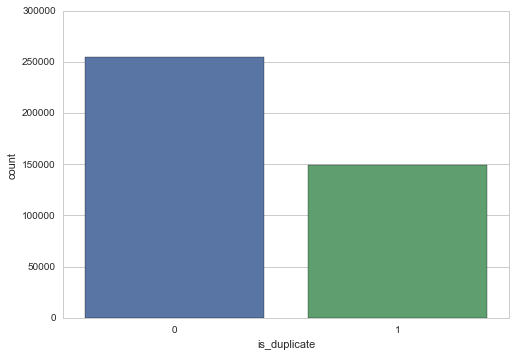

In [5]:
sns.set(style="whitegrid")
ax = sns.countplot(x="is_duplicate", data=df_train)

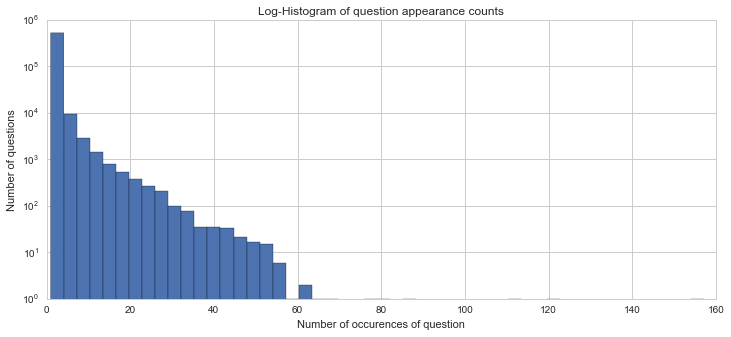

In [19]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
#sns.distplot(qids, bins=50, kde=False)

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

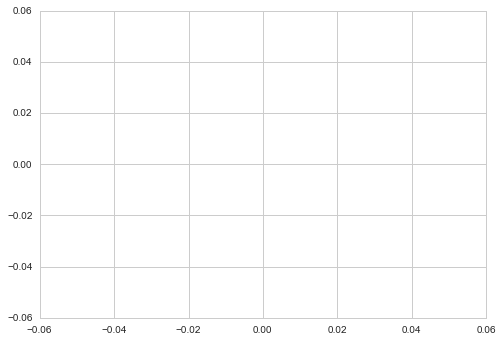

In [26]:
# Since % of duplicate labels are 37% in the training set, we can estimate the % in the test set
# by using the logloss formula
from sklearn.metrics import log_loss

l = []
p = [0.37] * 1000
for r in range(1, 1000):
    y = [1]*r + [0]*(1000-r)
    l.append(log_loss(y, p))

plt.plot(x=np.arange(0, 100.1, 0.1), y=l)
plt.show()